# jm_pandas test

## TO-DO
- OJO con los annotates de % si van arriba o abajo 
- Ver el Offset en cada caso si es positive or negative..??

In [1]:
## Standard Libs
from typing import Union, Optional, Tuple, Dict, Any
import warnings
import random

# Third-Party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# # Local Libs
# from jm_datascience import jm_pandas as jm_pd
# from jm_datascience import jm_pdaccessor as jm
# from jm_utils import jm_richprt as jm_prt


## Some Series and DFs

In [2]:
df_work = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'apellido': ['A_Ana', 'B_Bob', None, 'C_Carlos', None, 'D_Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

## Read spreedsheet for tests
try:
    spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
    with open(spreedsheet) as f:
        pass
except FileNotFoundError:
    spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df_xls = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')
df = df_xls.copy()

lst_str = random.choices([chr(i) for i in range(65, 72)], k=175)
# sr_str = jm_pd.to_series(lst_str)                         # <- jm_pd.to_serie_with_count()

In [3]:
def get_colorblind_palette_list():
    """
    Retorna una lista de colores (hexadecimales) amigables para personas
    con daltonismo, equivalentes a sns.color_palette('colorblind').
    """
    return [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
        '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
        '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
        '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
        '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
        '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
    ]


def get_colors_list(palette: str, n: Optional[int] = 10) -> list[str]:
    '''
    Return a valid matplotlib palette list
    - 'colorbind' <- daltonic, 'viridis', 'plasma', 'inferno', 'magma', 'cividis' <- daltonic, set3, set2
    - 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
    'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
    'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
    'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 
    'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
    'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
    'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
    'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
    'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 
    'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
    'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
    'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
    'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'",
    '''
    if n < 6:       # To get a softer range of colors if n is too small           
        n = 6

    if palette == 'colorblind':
        colors_list = get_colorblind_palette_list()
    elif palette == 'set2':
        colors_list = plt.cm.Set2(np.linspace(0, 1, n))
    elif palette == 'set3':
        colors_list = plt.cm.Set3(np.linspace(0, 1, n))
    else:
        cmap = plt.get_cmap(palette, n)              # Use palette colormap
        colors_list = [cmap(i) for i in range(n)]    # Get colors from the colormap

    return colors_list


In [4]:
def to_series(
    data: Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame],
    index: Optional[pd.Index] = None,
    name: Optional[str] = None
) -> pd.Series:
    """
    Converts input data into a pandas Series, optionally returning value counts.

    This function accepts various data types and converts them into a pandas Series.
    If `count=True`, it returns the frequency count of the values in the resulting Series.

    Parameters:
        data (Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame]):
            The input data to convert. Supported types include:
            - pd.Series: returned as-is or counted if `count=True`.
            - np.ndarray: flattened and converted to a Series.
            - dict: keys become the index, values are used for data.
            - list or set: converted directly to a Series.
            - pd.DataFrame:
                - 1 column: converted directly to a Series.
                - 2 columns: first column becomes the index, second becomes the values.

        count (bool or int, optional): Whether to return value counts instead of raw data.
            If True or 1, returns frequencies of each value. Default is False.

    Returns:
        pd.Series: A pandas Series representing the input data. If `count=True`, returns
            the value counts of the data.

    Raises:
        TypeError: If `data` is not one of the supported types.
        ValueError: If `count` is not a boolean or integer 0/1.
        ValueError: If DataFrame has more than 2 columns.

    Examples:
        >>> import pandas as pd
        >>> to_serie_with_count([1, 2, 2, 3])
        0    1
        1    2
        2    2
        3    3
        dtype: int64

        >>> to_serie_with_count([1, 2, 2, 3], count=True)
        2    2
        1    1
        3    1
        dtype: int64

        >>> df = pd.DataFrame({'Category': ['A', 'B', 'A'], 'Value': [10, 20, 30]})
        >>> to_serie_with_count(df)
        Category
        A    10
        B    20
        A    30
        Name: Value, dtype: int64
    """
    
    # Validate parameters - FUTURE
    
    if isinstance(data, pd.Series):                 # If series is already a Series no conversion needed
        series = data                                  
    elif isinstance(data, np.ndarray):              # If data is a NumPy array   
        series = pd.Series(data.flatten())
    elif isinstance(data, (dict, list)):
        series = pd.Series(data)
    elif isinstance(data, (set)):
        series = pd.Series(tuple(data))
    elif isinstance(data, pd.DataFrame):
        if data.shape[1] == 1:                      # Also len(data.columns == 1)
            series = data.iloc[:, 0]
        elif data.shape[1] == 2:                    # Index: first col, Data: 2nd Col
            series = data.set_index(data.columns[0])[data.columns[1]]
        else:
            raise ValueError("DataFrame must have 1 oer 2 columns. Categories and values for 2 columns cases.")
    else:
        raise TypeError(f"Unsupported data type: {type(data)}. "
                    "Supported types: pd.Series, np.ndarray, pd.DataFrame, dict, list, set, and pd.DataFrame")

    if name:
        series.name = name

    if index:
        series.index = index

    return series

In [5]:
def get_fdt(
        data: Union[pd.Series, np.ndarray, dict, list, pd.DataFrame],
        value_counts: Optional[bool] = False,
        pcts: Optional[bool] = True,
        plain_relatives: Optional[bool] = True,
        fmt_values: Optional[bool] = False,
        sort: Optional[str] = 'desc',
        nans: Optional[str] = 'drop'
) -> pd.DataFrame:
    '''
    Generata a Frequency Distribution Table (fdt)

    data: puede ser ya con el value_counts() hecho o no
    sort: 'desc', 'asc', 'ix_asc', 'ix_desc', para como queremos que sea vea el orden por valores o por indice
    nans: 'drop', 'last', 'sort'
    '''
    columns = [
        'Frequency',
        'Cumulative Frequency',
        'Relative Frequency',
        'Cumulative Relative Freq.',
        'Relative Freq. [%]',
        'Cumulative Freq. [%]'
    ]
    
    sr = to_series(data)
    # nans = sr.isna().sum()        # FUTURE to think if nans is interesting to see here or in a pareto u other categorical chart

    if value_counts:
        sr = sr.value_counts()

    fdt = pd.DataFrame(sr)
    fdt.columns = [columns[0]]
    fdt[columns[1]] = fdt['Frequency'].cumsum()
    fdt[columns[2]] = fdt['Frequency'] / fdt['Frequency'].sum()
    fdt[columns[3]] = fdt['Relative Frequency'].cumsum()
    fdt[columns[4]] = fdt['Relative Frequency'] * 100
    fdt[columns[5]] = fdt['Cumulative Relative Freq.'] * 100

    if not pcts:                    # Don't return percentage columns
        fdt = fdt[columns[0:4]]
    
    if not plain_relatives:         # Don't return relative and plain cumulative
        fdt = fdt[[columns[0], columns[4], columns[5]]]

    # if fmt_values:
    #     fdt = fdt.map(_fmt_value_for_pd)
        
    match sort:
        case 'asc':
            return fdt.sort_values(by=columns[0])
        case 'ix_asc':
            return fdt.sort_index()
        case 'ix_desc':
            return fdt.sort_index(ascending=False)
        case _:
            return fdt

In [36]:
def plt_pareto3(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = True,
    alpha: float = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    show_reference_lines: bool = True,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):     # pd.Series or pd.Datafram
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    # line_size = width
    bar_label_size = width
    axis_label_size = width * 1.25
    # title_size = axis_label_size * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # Don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                padding=4)                  

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()         # create another y-axis sharing a common x-axis
    ax2.set_ylim(0, 100)     # make the secondary y scale from 0 to 100

    # Plot cumulative percentage line
    line = ax2.plot(fdt.index, fdt.iloc[:, -1],        # last column: ['Cumulative Freq. [%]']
                    color=color2,
                    marker="D",
                    markersize=markersize,
                    linewidth=linewidth,
                    markeredgecolor='white',
                    markeredgewidth=0.2)
    
    # Format secondary y-axis as percentage
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add marker labels (in percentage) 
    formatted_weights = [f'{x:.{pct_decimals}f}%' for x in fdt.iloc[:, -1]]  
    for i, txt in enumerate(formatted_weights):
            ax2.annotate(txt,
                        (fdt.index[i], fdt.iloc[:, -1].iloc[i] - 6),
                        color=color2,
                        fontsize=bar_label_size,
                        ha='center')
                        # fontweight='bold')    

    # Configure tick parameters (specify axis colors and x-axis rotation)
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits with better spacing
    max_freq = fdt.iloc[:, 0].max()
    ax.set_ylim(0, max_freq * 1.2)
    ax2.set_ylim(0, 100 * 1.1)         # Slightly above 100% for better visual

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels (use defaults if not provided)
    # title = f"{title} \t (Nulls: {nulls})" 

    if not x_label:
         x_label = fdt.index.name       # or 'Categories'
    
    if not y1_label:
         y1_label = fdt.columns[0]      # if len(fdt.columns) > 0 else 'Frequency'

    if not y2_label:
         y2_label = fdt.columns[-1]     # if len(fdt.columns) > 0 else 'Cumulative %'

    # Apply title adn labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1 )
    ax.set_xlabel(x_label, fontsize=axis_label_size)    #, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)   #, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)  #, fontweight='bold')

        # Add reference lines if requested
    if show_reference_lines and reference_pct is not None:
        # AXHLINE: Add horizontal reference line
        ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                   alpha=0.7, linewidth=reference_linewidth)
        
        # Add text labels for the reference threshold
        ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                    transform=ax2.get_yaxis_transform(), 
                    color=reference_color, fontsize=bar_label_size*0.8) #, fontweight='bold')
        
        # AXVLINE: Find the x-position where cumulative percentage crosses reference threshold
        cumulative_values = fdt.iloc[:, -1].values
        x_positions = range(len(fdt.index))
        
        # Find the exact x-position for reference threshold
        x_reference_percent = None
        for i, cum_pct in enumerate(cumulative_values):
            if cum_pct >= reference_pct:
                if i == 0:
                    x_reference_percent = 0
                else:
                    # Linear interpolation between points
                    prev_pct = cumulative_values[i-1]
                    curr_pct = cumulative_values[i]
                    # Calculate exact position using linear interpolation
                    x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                break
        
        # Add vertical line at reference threshold if found
        if x_reference_percent is not None:
            ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            # Add vertical line label
            ax2.text(x_reference_percent + 0.1, reference_pct - 25, 
                     f'{reference_pct}% threshold', 
                     rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                    ha='left', va='center') #, fontweight='bold'

    return fig, (ax, ax2)


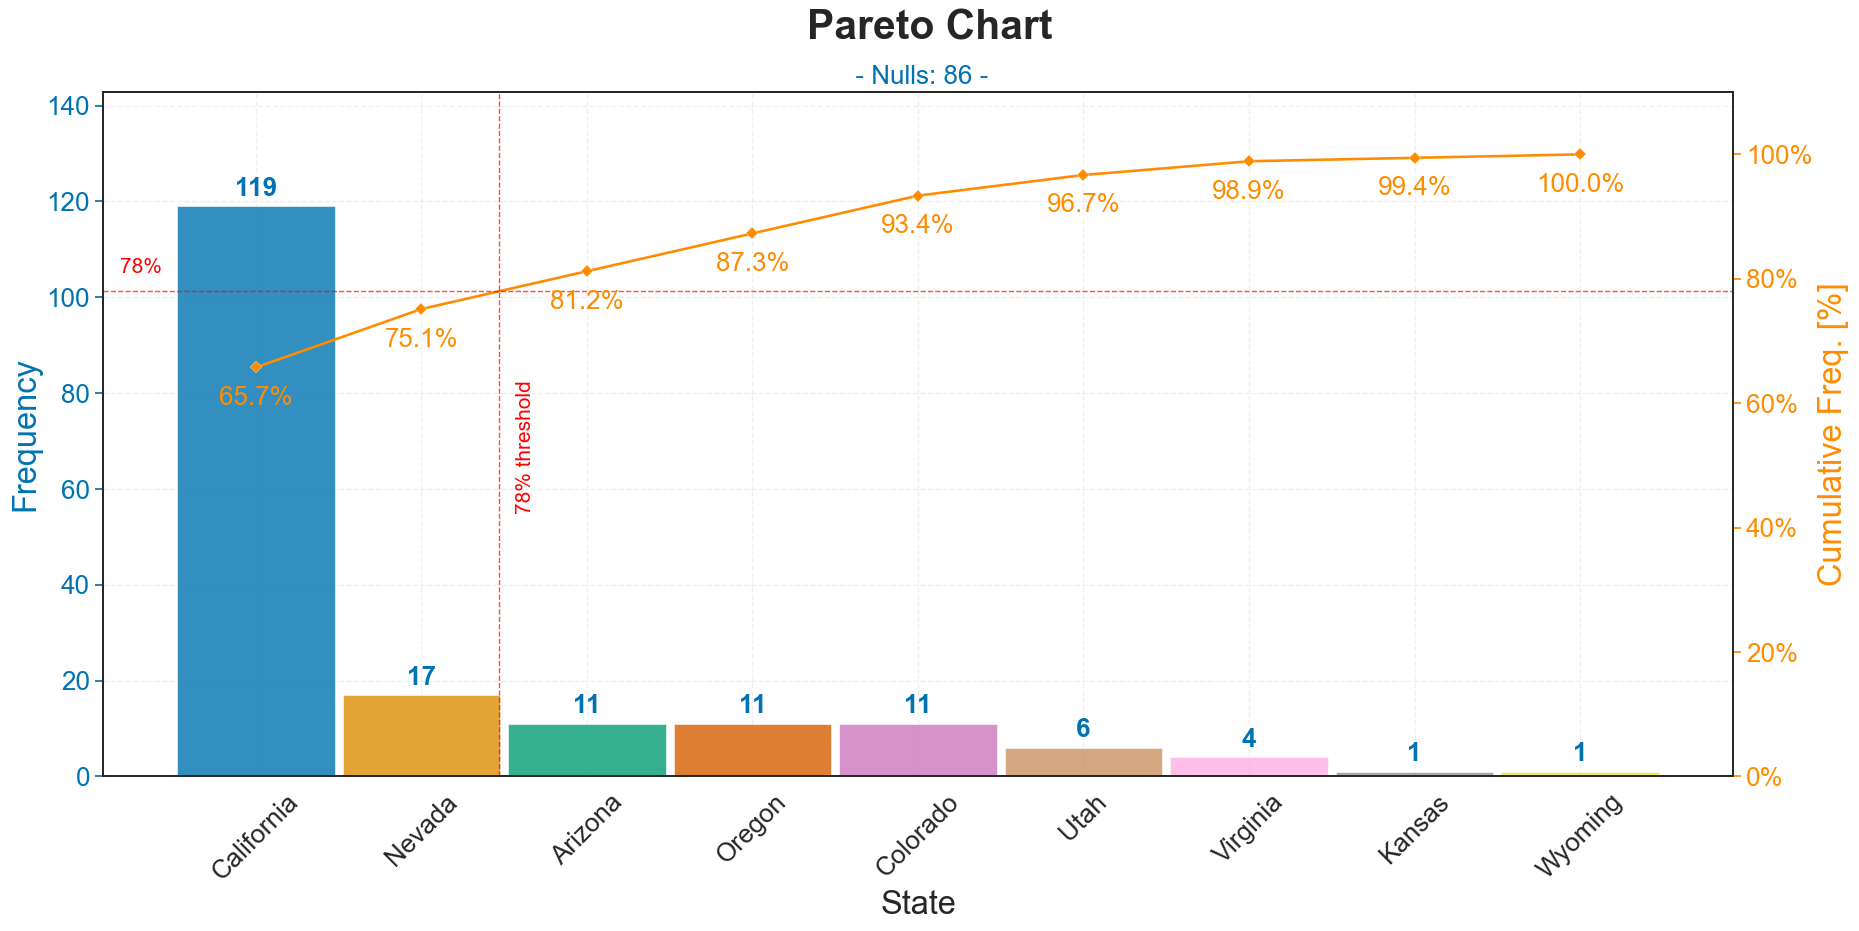

In [37]:
fig, (bars, line) = plt_pareto3(df['State'], value_counts=True, scale=5, reference_pct=78, palette='colorblind')
# fig, (bars, line) = plt_pareto3(df['State'], value_counts=True, scale=4)

In [8]:
## BK - jm Original Pareto
def plt_pareto(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    line_size = 4,
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
) -> tuple[plt.Figure, plt.Axes]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):     # pd.Series or pd.Datafram
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Build graphs size, and fonts size from scale, and validate scale from 1 to 6.
    if scale < 1 or scale > 9:
        raise ValueError(f"[ERROR] Invalid 'scale' value. Must between '1' and '9', not '{scale}'.")
    else:
        scale = round(scale)

    # Get de fdt
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    multiplier, w_base, h_base  = 1.33333334 ** scale, 4.45, 2.25
    width, high= w_base * multiplier, h_base * multiplier
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = axis_label_size * 1.25

    # define aesthetics for plot - color1 and 2 plus line_size
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]
    else:
        color_palette = color1

    # Base fig definitions - create basic bar plot
    fig, ax = plt.subplots(figsize=(width, high), tight_layout=True)
    bplot = ax.bar(fdt.index, fdt.iloc[:, 0], color=color_palette)

    # Add bar labels
    ax.bar_label(bplot,
                fontsize= bar_label_size,
                fontweight='bold',
                color=color1,
                padding=4)                      

    # add cumulative percentage line to plot
    ax2 = ax.twinx()                    # create another y-axis sharing a common x-axis
    ax2.set_ylim(0, 100)     # make the secondary y scale from 0 to 100

    ax2.plot(fdt.index,
            fdt.iloc[:, -1],
            color=color2,
            marker="D",
            ms=line_size)

    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add marker labels (in percentage) 
    formatted_weights = [f'{x:.{pct_decimals}f}%' for x in fdt.iloc[:, -1]]  
    for i, txt in enumerate(formatted_weights):
            ax2.annotate(txt,
                        (fdt.index[i], fdt.iloc[:, -1].iloc[i] - 6),
                        color=color2, fontsize=bar_label_size)    

    # specify axis colors and x-axis rotation
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim
    ax.set_ylim(0, fdt.iloc[:, 0].iloc[0] * 1.2 )
    ax2.set_ylim(0, 100 * 1.1)

    # Titles - Labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=axis_label_size)    #, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)   #, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)  #, fontweight='bold')

    return fig


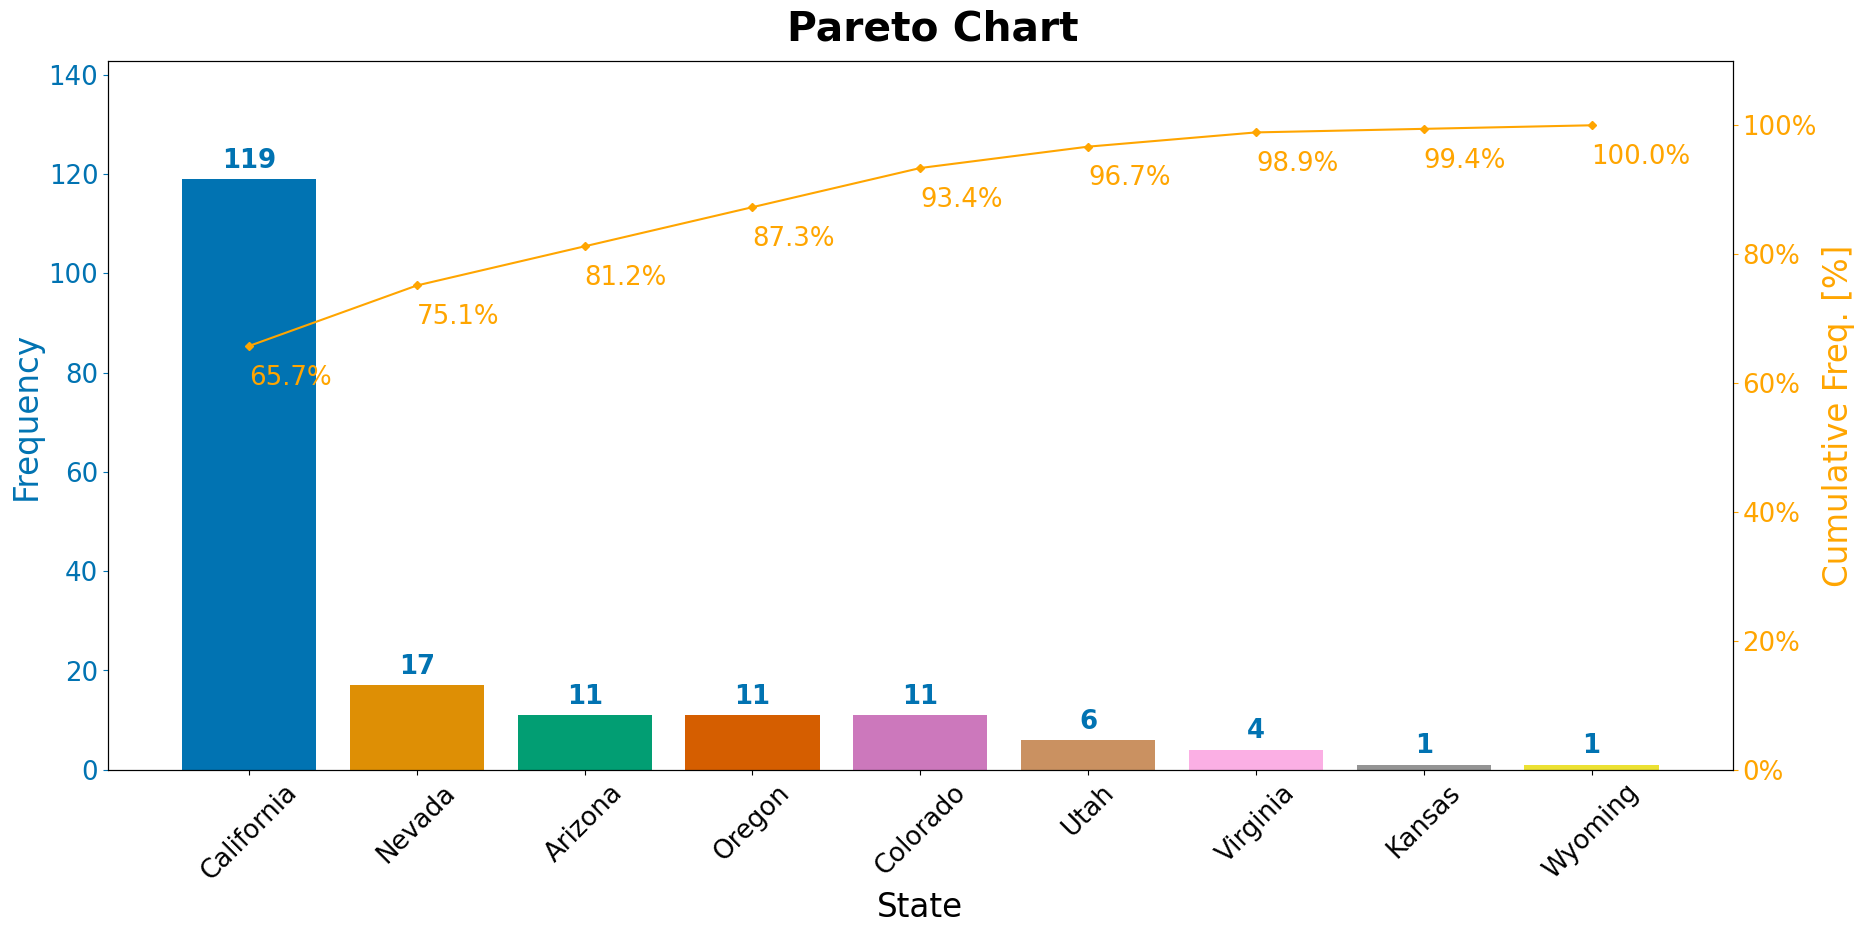

In [9]:
fig = plt_pareto(df['State'], value_counts=True, scale=5, color2='orange', palette='colorblind')

In [10]:
def plt_pareto2(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: bool = False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    line_size: int = 4,
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = True,
    alpha: float = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    show_reference_lines: bool = True,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:
    """
    Create a Pareto chart with frequency bars and cumulative percentage line.
    
    Parameters:
    -----------
    data : pd.Series or pd.DataFrame
        Input data for the Pareto chart
    value_counts : bool, default False
        Whether to apply value_counts to the data
    scale : int, default 2
        Scale factor for plot sizing (1-9)
    title : str, default 'Pareto Chart'
        Chart title
    x_label : str, optional
        X-axis label (uses index name if None)
    y1_label : str, optional
        Primary y-axis label (uses first column name if None)
    y2_label : str, optional
        Secondary y-axis label (uses last column name if None)
    palette : list, optional
        Color palette for bars
    color1 : str, default 'midnightblue'
        Color for bars and primary y-axis
    color2 : str, default 'darkorange'
        Color for line and secondary y-axis
    line_size : int, default 4
        Size of line markers
    pct_decimals : int, default 1
        Decimal places for percentage labels
    label_rotate : float, default 45
        Rotation angle for x-axis labels
    figsize : tuple, optional
        Figure size (width, height). If None, calculated from scale
    show_grid : bool, default True
        Whether to show grid lines
    alpha : float, default 0.8
        Transparency for bars
    reference_pct : float, default 80
        Percentage threshold for reference lines (e.g., 80 for 80%)
    reference_linewidth : float, default 1
        Width of reference lines
    reference_color : str, default 'red'
        Color of reference lines
    show_reference_lines : bool, default True
        Whether to show reference lines
        
    Returns:
    --------
    tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]
        Figure and axes objects (primary_ax, secondary_ax)
        
    Raises:
    -------
    TypeError
        If data is not a pandas Series or DataFrame
    ValueError
        If scale is not between 1 and 9
    """
    
    # Convert to series if DataFrame
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")
    
    scale = round(scale)

    # Get frequency distribution table
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)
    
    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = axis_label_size * 1.25

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # Don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette, 
                  alpha=alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                padding=4)

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    ax2.set_ylim(0, 100)

    # Plot cumulative percentage line
    line = ax2.plot(fdt.index,
                    fdt.iloc[:, -1],
                    color=color2,
                    marker="D",
                    markersize=line_size,
                    linewidth=2,
                    markeredgecolor='white',
                    markeredgewidth=1)

    # Format secondary y-axis as percentage
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add percentage labels on line markers
    formatted_percentages = [f'{x:.{pct_decimals}f}%' for x in fdt.iloc[:, -1]]
    for i, (txt, y_val) in enumerate(zip(formatted_percentages, fdt.iloc[:, -1])):
        ax2.annotate(txt,
                    (fdt.index[i], y_val - 6),
                    color=color2, 
                    fontsize=bar_label_size,
                    ha='center',
                    fontweight='bold')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits with better spacing
    max_freq = fdt.iloc[:, 0].max()
    ax.set_ylim(0, max_freq * 1.1)
    ax2.set_ylim(0, 105)  # Slightly above 100% for better visual

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set labels (use defaults if not provided)
    if x_label is None:
        x_label = fdt.index.name or 'Categories'
    
    if y1_label is None:
        y1_label = fdt.columns[0] if len(fdt.columns) > 0 else 'Frequency'

    if y2_label is None:
        y2_label = fdt.columns[-1] if len(fdt.columns) > 0 else 'Cumulative %'

    # Apply labels and title
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='bold')

    # Add reference lines if requested
    if show_reference_lines and reference_pct is not None:
        # Add horizontal reference line
        ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                   alpha=0.7, linewidth=reference_linewidth)
        
        # Find the x-position where cumulative percentage crosses reference threshold
        cumulative_values = fdt.iloc[:, -1].values
        x_positions = range(len(fdt.index))
        
        # Find the exact x-position for reference threshold
        x_reference_percent = None
        for i, cum_pct in enumerate(cumulative_values):
            if cum_pct >= reference_pct:
                if i == 0:
                    x_reference_percent = 0
                else:
                    # Linear interpolation between points
                    prev_pct = cumulative_values[i-1]
                    curr_pct = cumulative_values[i]
                    # Calculate exact position using linear interpolation
                    x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                break
        
        # Add vertical line at reference threshold if found
        if x_reference_percent is not None:
            ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            # Add text labels for the reference threshold
            ax2.text(0.02, reference_pct + 2, f'{reference_pct}%', 
                     transform=ax2.get_yaxis_transform(), 
                     color=reference_color, fontsize=bar_label_size*0.8, fontweight='bold')
            
            # Add vertical line label
            ax2.text(x_reference_percent + 0.1, reference_pct - 5, 
                     f'{reference_pct}% threshold', 
                     rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                     fontweight='bold', ha='left', va='center')

    return fig, (ax, ax2)

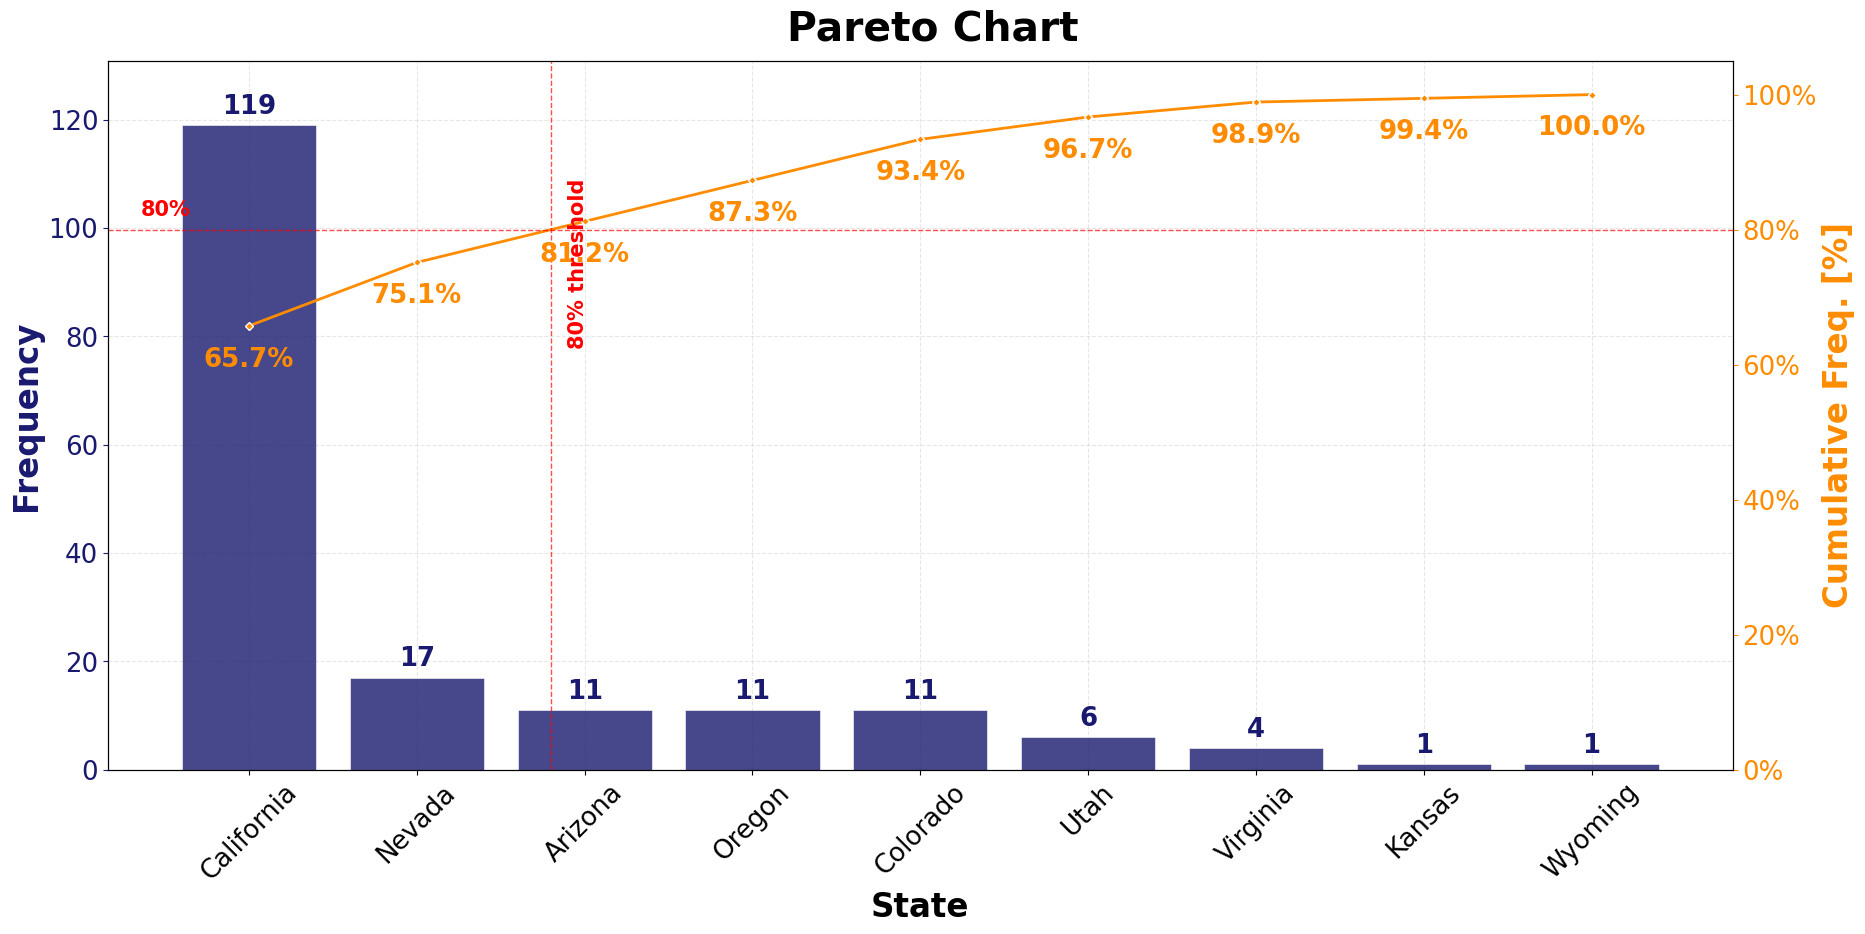

In [11]:
fig, (bars, line) = plt_pareto2(df['State'], value_counts=True, scale=5)

In [12]:
def plt_pareto1(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: bool = False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    line_size: int = 4,
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = False,
    alpha: float = 0.8,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:
    """
    Create a Pareto chart with frequency bars and cumulative percentage line.
    
    Parameters:
    -----------
    data : pd.Series or pd.DataFrame
        Input data for the Pareto chart
    value_counts : bool, default False
        Whether to apply value_counts to the data
    scale : int, default 2
        Scale factor for plot sizing (1-9)
    title : str, default 'Pareto Chart'
        Chart title
    x_label : str, optional
        X-axis label (uses index name if None)
    y1_label : str, optional
        Primary y-axis label (uses first column name if None)
    y2_label : str, optional
        Secondary y-axis label (uses last column name if None)
    palette : list, optional
        Color palette for bars
    color1 : str, default 'midnightblue'
        Color for bars and primary y-axis
    color2 : str, default 'darkorange'
        Color for line and secondary y-axis
    line_size : int, default 4
        Size of line markers
    pct_decimals : int, default 1
        Decimal places for percentage labels
    label_rotate : float, default 45
        Rotation angle for x-axis labels
    figsize : tuple, optional
        Figure size (width, height). If None, calculated from scale
    show_grid : bool, default True
        Whether to show grid lines
    alpha : float, default 0.8
        Transparency for bars
        
    Returns:
    --------
    tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]
        Figure and axes objects (primary_ax, secondary_ax)
        
    Raises:
    -------
    TypeError
        If data is not a pandas Series or DataFrame
    ValueError
        If scale is not between 1 and 9
    """
    
    # Convert to series if DataFrame
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)

    # Get frequency distribution table
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)
    
    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes and pct_line size based on figure width
    line_size = width * 0.9
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = axis_label_size * 1.25

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        if not color1:  # Only override if color1 wasn't explicitly set
            color1 = color_palette[0]
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette, 
                  alpha=alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                padding=4)

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    ax2.set_ylim(0, 100)

    # Plot cumulative percentage line
    line = ax2.plot(fdt.index,
                    fdt.iloc[:, -1],
                    color=color2,
                    marker="D",
                    markersize=line_size,
                    linewidth=2,
                    markeredgecolor='white',
                    markeredgewidth=1)

    # Format secondary y-axis as percentage
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add percentage labels on line markers
    formatted_percentages = [f'{x:.{pct_decimals}f}%' for x in fdt.iloc[:, -1]]
    for i, (txt, y_val) in enumerate(zip(formatted_percentages, fdt.iloc[:, -1])):
        ax2.annotate(txt,
                    (fdt.index[i], y_val - 6),
                    color=color2, 
                    fontsize=bar_label_size,
                    ha='center',
                    fontweight='bold')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits with better spacing
    max_freq = fdt.iloc[:, 0].max()
    ax.set_ylim(0, max_freq * 1.1)
    ax2.set_ylim(0, 105)  # Slightly above 100% for better visual

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set labels (use defaults if not provided)
    if x_label is None:
        x_label = fdt.index.name or 'Categories'
    
    if y1_label is None:
        y1_label = fdt.columns[0] if len(fdt.columns) > 0 else 'Frequency'

    if y2_label is None:
        y2_label = fdt.columns[-1] if len(fdt.columns) > 0 else 'Cumulative %'

    # Apply labels and title
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='bold')

    # Add 80% reference lines (common in Pareto analysis)
    ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, linewidth=1)
    
    # Find the x-position where cumulative percentage crosses 80%
    cumulative_values = fdt.iloc[:, -1].values
    x_positions = range(len(fdt.index))
    
    # Find the exact x-position for 80% threshold
    x_80_percent = None
    for i, cum_pct in enumerate(cumulative_values):
        if cum_pct >= 80:
            if i == 0:
                x_80_percent = 0
            else:
                # Linear interpolation between points
                prev_pct = cumulative_values[i-1]
                curr_pct = cumulative_values[i]
                # Calculate exact position using linear interpolation
                x_80_percent = (i-1) + (80 - prev_pct) / (curr_pct - prev_pct)
            break
    
    # Add vertical line at 80% threshold if found
    if x_80_percent is not None:
        ax2.axvline(x=x_80_percent, color='red', linestyle='--', alpha=0.7, linewidth=1)
        
        # Add text labels for the 80% threshold
        ax2.text(0.01, 83, '80%', transform=ax2.get_yaxis_transform(), 
                 color='red', fontsize=bar_label_size*0.9, fontweight='bold')
        
        # # Add vertical line label
        # ax2.text(x_80_percent + 0.1, 75, '80% threshold', 
        #          rotation=90, color='red', fontsize=bar_label_size*0.8, 
        #          fontweight='bold', ha='left', va='center')

    return fig, (ax, ax2)


# Example usage and helper functions you might need:
"""
# Example helper functions (you may already have these):

def to_series(df):
    '''Convert DataFrame to Series, taking first column or combining if needed'''
    if isinstance(df, pd.DataFrame):
        if df.shape[1] == 1:
            return df.iloc[:, 0]
        else:
            # You might want to sum across columns or handle differently
            return df.sum(axis=1)
    return df

def get_fdt(data, value_counts=False, plain_relatives=False):
    '''Get frequency distribution table with cumulative percentages'''
    if value_counts:
        freq_data = data.value_counts().sort_values(ascending=False)
    else:
        freq_data = data.sort_values(ascending=False)
    
    # Calculate cumulative percentages
    cumulative_pct = (freq_data.cumsum() / freq_data.sum() * 100)
    
    # Create DataFrame
    fdt = pd.DataFrame({
        'Frequency': freq_data,
        'Cumulative %': cumulative_pct
    })
    
    return fdt

def get_colors_list(palette, n_colors):
    '''Generate list of colors from palette'''
    if isinstance(palette, str):
        # Handle named palettes
        import matplotlib.pyplot as plt
        cmap = plt.cm.get_cmap(palette)
        return [cmap(i / (n_colors - 1)) for i in range(n_colors)]
    elif isinstance(palette, list):
        # Extend or truncate list as needed
        if len(palette) >= n_colors:
            return palette[:n_colors]
        else:
            # Repeat colors if not enough
            return (palette * (n_colors // len(palette) + 1))[:n_colors]
    else:
        return palette
"""

"\n# Example helper functions (you may already have these):\n\ndef to_series(df):\n    '''Convert DataFrame to Series, taking first column or combining if needed'''\n    if isinstance(df, pd.DataFrame):\n        if df.shape[1] == 1:\n            return df.iloc[:, 0]\n        else:\n            # You might want to sum across columns or handle differently\n            return df.sum(axis=1)\n    return df\n\ndef get_fdt(data, value_counts=False, plain_relatives=False):\n    '''Get frequency distribution table with cumulative percentages'''\n    if value_counts:\n        freq_data = data.value_counts().sort_values(ascending=False)\n    else:\n        freq_data = data.sort_values(ascending=False)\n\n    # Calculate cumulative percentages\n    cumulative_pct = (freq_data.cumsum() / freq_data.sum() * 100)\n\n    # Create DataFrame\n    fdt = pd.DataFrame({\n        'Frequency': freq_data,\n        'Cumulative %': cumulative_pct\n    })\n\n    return fdt\n\ndef get_colors_list(palette, n_color

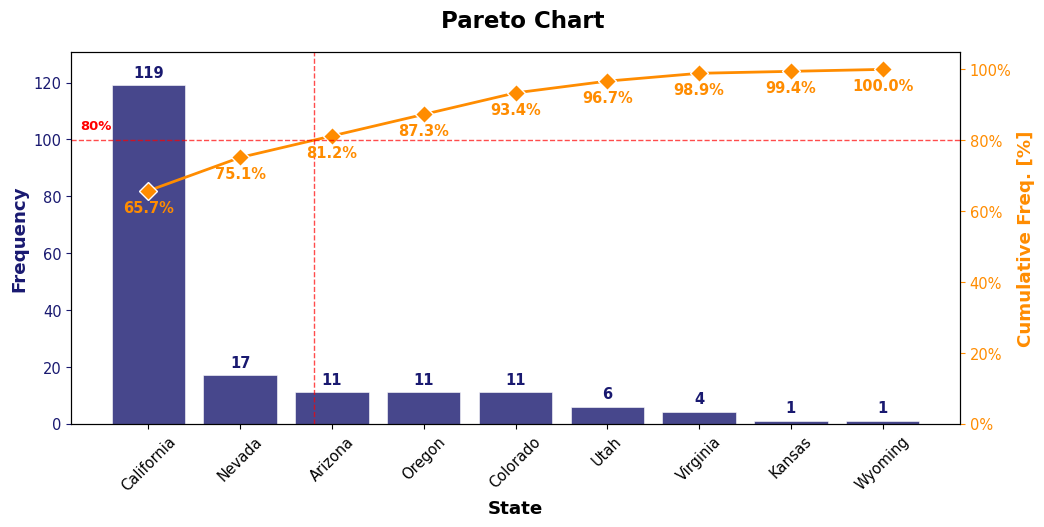

In [13]:
fig = plt_pareto1(df['State'], value_counts=True, scale=3)  #, color2='orange', palette='set2')

In [14]:

def sns_pareto(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: bool = False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[str] = None,
    color1: Optional[str] = None,
    color2: Optional[str] = None,
    line_size: int = 4,
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = True,
    alpha: float = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    show_reference_lines: bool = True,
    style: str = 'whitegrid',
    context: str = 'notebook',
    bar_edgecolor: str = 'white',
    bar_linewidth: float = 0.8,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:
    """
    Create a Pareto chart using Seaborn with frequency bars and cumulative percentage line.
    
    Parameters:
    -----------
    data : pd.Series or pd.DataFrame
        Input data for the Pareto chart
    value_counts : bool, default False
        Whether to apply value_counts to the data
    scale : int, default 2
        Scale factor for plot sizing (1-9)
    title : str, default 'Pareto Chart'
        Chart title
    x_label : str, optional
        X-axis label (uses index name if None)
    y1_label : str, optional
        Primary y-axis label (uses first column name if None)
    y2_label : str, optional
        Secondary y-axis label (uses last column name if None)
    palette : str, optional
        Seaborn color palette name (e.g., 'viridis', 'Set1', 'husl')
    color1 : str, optional
        Color for bars and primary y-axis (overrides palette)
    color2 : str, optional
        Color for line and secondary y-axis
    line_size : int, default 4
        Size of line markers
    pct_decimals : int, default 1
        Decimal places for percentage labels
    label_rotate : float, default 45
        Rotation angle for x-axis labels
    figsize : tuple, optional
        Figure size (width, height). If None, calculated from scale
    show_grid : bool, default True
        Whether to show grid lines
    alpha : float, default 0.8
        Transparency for bars
    reference_pct : float, default 80
        Percentage threshold for reference lines
    reference_linewidth : float, default 1
        Width of reference lines
    reference_color : str, default 'red'
        Color of reference lines
    show_reference_lines : bool, default True
        Whether to show reference lines
    style : str, default 'whitegrid'
        Seaborn style ('whitegrid', 'darkgrid', 'white', 'dark', 'ticks')
    context : str, default 'notebook'
        Seaborn context ('paper', 'notebook', 'talk', 'poster')
    bar_edgecolor : str, default 'white'
        Color of bar edges
    bar_linewidth : float, default 0.8
        Width of bar edges
        
    Returns:
    --------
    tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]
        Figure and axes objects (primary_ax, secondary_ax)
        
    Raises:
    -------
    TypeError
        If data is not a pandas Series or DataFrame
    ValueError
        If scale is not between 1 and 9, or reference_pct is invalid
    """
    
    # Set seaborn style and context
    sns.set_style(style)
    sns.set_context(context)
    
    # Convert to series if DataFrame
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")
    
    scale = round(scale)

    # Get frequency distribution table
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)
    
    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width * 0.8
    axis_label_size = width * 1.0
    title_size = axis_label_size * 1.2

    # Set up colors using seaborn
    if palette and not color1:
        # Use seaborn color palette
        colors = sns.color_palette(palette, n_colors=len(fdt))
        color1 = colors[0]
    elif not color1:
        # Use seaborn default colors
        colors = sns.color_palette("husl", n_colors=len(fdt))
        color1 = colors[0]
    else:
        # Use specified color1
        colors = [color1] * len(fdt)
    
    # Set default color2 if not specified
    if not color2:
        color2 = sns.color_palette("Set1")[1]  # Nice orange from Set1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot using seaborn
    bars = sns.barplot(
        x=fdt.index,
        y=fdt.iloc[:, 0],
        palette=colors if palette else color1,
        alpha=alpha,
        edgecolor=bar_edgecolor,
        linewidth=bar_linewidth,
        ax=ax
    )

    # Add value labels on bars
    for i, bar in enumerate(bars.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}',
                ha='center', va='bottom',
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1 if isinstance(color1, str) else colors[i])

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    ax2.set_ylim(0, 100)

    # Plot cumulative percentage line using seaborn
    line_data = pd.DataFrame({
        'x': range(len(fdt.index)),
        'y': fdt.iloc[:, -1].values
    })
    
    sns.lineplot(
        data=line_data,
        x='x',
        y='y',
        color=color2,
        marker='D',
        markersize=line_size,
        linewidth=2,
        markeredgecolor='white',
        markeredgewidth=1,
        ax=ax2
    )

    # Format secondary y-axis as percentage
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Add percentage labels on line markers
    formatted_percentages = [f'{x:.{pct_decimals}f}%' for x in fdt.iloc[:, -1]]
    for i, (txt, y_val) in enumerate(zip(formatted_percentages, fdt.iloc[:, -1])):
        ax2.annotate(txt,
                    (i, y_val - 6),
                    color=color2, 
                    fontsize=bar_label_size,
                    ha='center',
                    fontweight='bold')

    # Configure tick parameters with seaborn aesthetics
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits with better spacing
    max_freq = fdt.iloc[:, 0].max()
    ax.set_ylim(0, max_freq * 1.1)
    ax2.set_ylim(0, 105)

    # Grid is handled by seaborn style, but we can override
    if not show_grid:
        ax.grid(False)
    
    # Set x-axis tick labels
    ax.set_xticks(range(len(fdt.index)))
    ax.set_xticklabels(fdt.index, rotation=label_rotate)

    # Set labels (use defaults if not provided)
    if x_label is None:
        x_label = fdt.index.name or 'Categories'
    
    if y1_label is None:
        y1_label = fdt.columns[0] if len(fdt.columns) > 0 else 'Frequency'

    if y2_label is None:
        y2_label = fdt.columns[-1] if len(fdt.columns) > 0 else 'Cumulative %'

    # Apply labels and title with seaborn aesthetics
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='bold')

    # Add reference lines if requested
    if show_reference_lines and reference_pct is not None:
        # Add horizontal reference line
        ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                   alpha=0.7, linewidth=reference_linewidth)
        
        # Find the x-position where cumulative percentage crosses reference threshold
        cumulative_values = fdt.iloc[:, -1].values
        
        # Find the exact x-position for reference threshold
        x_reference_percent = None
        for i, cum_pct in enumerate(cumulative_values):
            if cum_pct >= reference_pct:
                if i == 0:
                    x_reference_percent = 0
                else:
                    # Linear interpolation between points
                    prev_pct = cumulative_values[i-1]
                    curr_pct = cumulative_values[i]
                    # Calculate exact position using linear interpolation
                    x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                break
        
        # Add vertical line at reference threshold if found
        if x_reference_percent is not None:
            ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            # Add text labels for the reference threshold
            ax2.text(0.02, reference_pct + 2, f'{reference_pct}%', 
                     transform=ax2.get_yaxis_transform(), 
                     color=reference_color, fontsize=bar_label_size*0.8, fontweight='bold')
            
            # Add vertical line label
            ax2.text(x_reference_percent + 0.1, reference_pct - 5, 
                     f'{reference_pct}% threshold', 
                     rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                     fontweight='bold', ha='left', va='center')

    return fig, (ax, ax2)


# Example usage with different seaborn styles and palettes:
"""
# Classic seaborn style
fig, (ax1, ax2) = sns_pareto(data, style='whitegrid', palette='viridis')

# Dark theme
fig, (ax1, ax2) = sns_pareto(data, style='darkgrid', palette='plasma')

# Minimal style
fig, (ax1, ax2) = sns_pareto(data, style='white', palette='Set2')

# Professional presentation
fig, (ax1, ax2) = sns_pareto(data, 
                            style='ticks', 
                            context='talk',
                            palette='deep',
                            reference_pct=75,
                            reference_color='crimson')

# Colorful and modern
fig, (ax1, ax2) = sns_pareto(data,
                            style='whitegrid',
                            palette='husl',
                            alpha=0.7,
                            bar_edgecolor='black',
                            bar_linewidth=1.2)
"""

"\n# Classic seaborn style\nfig, (ax1, ax2) = sns_pareto(data, style='whitegrid', palette='viridis')\n\n# Dark theme\nfig, (ax1, ax2) = sns_pareto(data, style='darkgrid', palette='plasma')\n\n# Minimal style\nfig, (ax1, ax2) = sns_pareto(data, style='white', palette='Set2')\n\n# Professional presentation\nfig, (ax1, ax2) = sns_pareto(data, \n                            style='ticks', \n                            context='talk',\n                            palette='deep',\n                            reference_pct=75,\n                            reference_color='crimson')\n\n# Colorful and modern\nfig, (ax1, ax2) = sns_pareto(data,\n                            style='whitegrid',\n                            palette='husl',\n                            alpha=0.7,\n                            bar_edgecolor='black',\n                            bar_linewidth=1.2)\n"

C:\Users\jm-mtm\AppData\Local\Temp\ipykernel_22420\3329075553.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


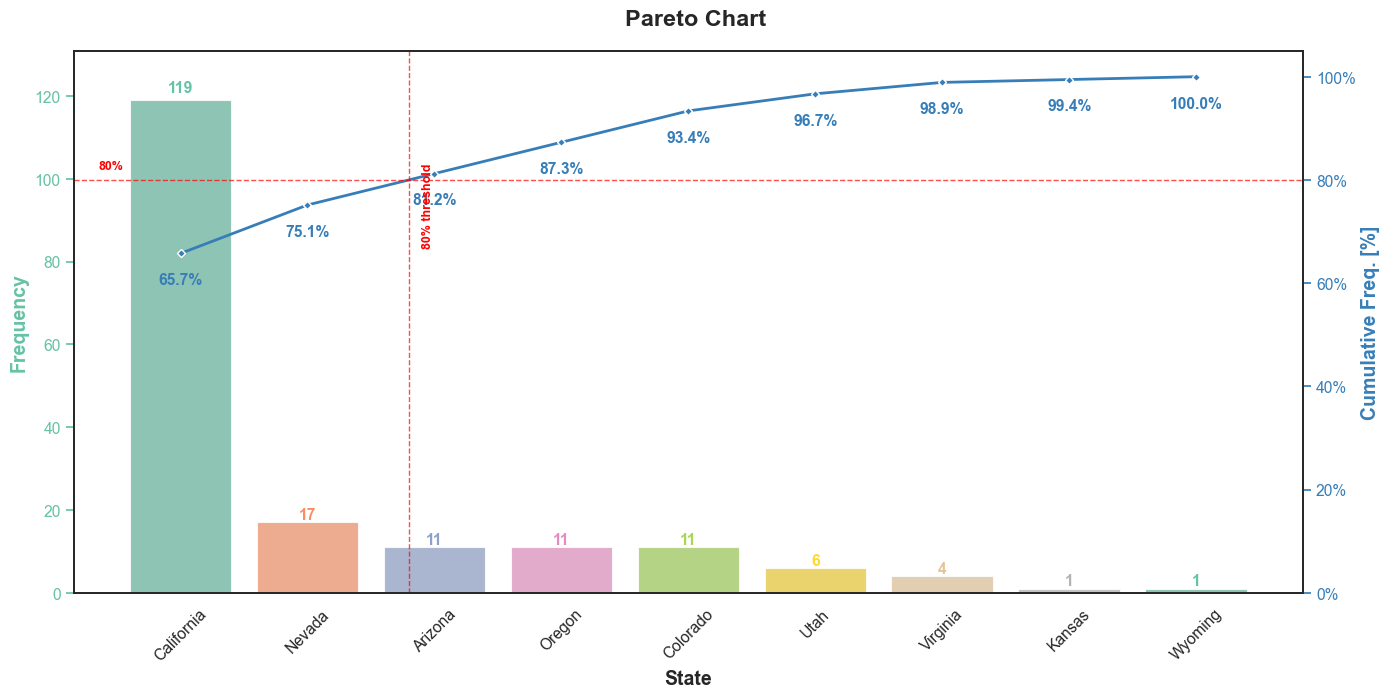

In [15]:
fig, (ax1, ax2) = sns_pareto(df['State'], value_counts=True, style='white', palette='Set2', scale=4)

In [39]:
def plt_pareto4(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = True,
    alpha: float = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    show_reference_lines: bool = True,
    cumulative_scale_mode: str = 'percentage',  # 'percentage' or 'proportional'
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):     # pd.Series or pd.Datafram
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Validate cumulative scale mode
    if cumulative_scale_mode not in ['percentage', 'proportional']:
        raise ValueError(f"cumulative_scale_mode must be 'percentage' or 'proportional', got {cumulative_scale_mode}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    # line_size = width
    bar_label_size = width
    axis_label_size = width * 1.25
    # title_size = axis_label_size * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # Don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                padding=4)                  

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()         # create another y-axis sharing a common x-axis
    
    # Calculate cumulative values and scale based on mode
    cumulative_percentages = fdt.iloc[:, -1]  # last column: ['Cumulative Freq. [%]']
    
    if cumulative_scale_mode == 'proportional':
        # Calculate total sum of all frequencies
        total_sum = fdt.iloc[:, 0].sum()
        # Convert cumulative percentages to proportional scale
        cumulative_scaled = (cumulative_percentages / 100) * total_sum
        ax2.set_ylim(0, total_sum * 1.2)  # Match primary axis scaling
        
        # Plot cumulative line with proportional scale
        line = ax2.plot(fdt.index, cumulative_scaled,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        # Add marker labels (still in percentage for clarity)
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            ax2.annotate(txt,
                        (fdt.index[i], cumulative_scaled.iloc[i] - (total_sum * 0.05)),
                        color=color2,
                        fontsize=bar_label_size,
                        ha='center')
        
        # Configure reference lines for proportional mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled = (reference_pct / 100) * total_sum
            
            # AXHLINE: Add horizontal reference line
            ax2.axhline(y=reference_scaled, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            # Add text labels for the reference threshold
            ax2.text(0.01, reference_scaled + (total_sum * 0.03), f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            
            # AXVLINE: Find the x-position where cumulative percentage crosses reference threshold
            cumulative_values = cumulative_percentages.values
            x_positions = range(len(fdt.index))
            
            # Find the exact x-position for reference threshold
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        # Linear interpolation between points
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        # Calculate exact position using linear interpolation
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            # Add vertical line at reference threshold if found
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                           alpha=0.7, linewidth=reference_linewidth)
                
                # Add vertical line label
                ax2.text(x_reference_percent + 0.1, reference_scaled - (total_sum * 0.2), 
                         f'{reference_pct}% threshold', 
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                        ha='left', va='center')
    
    else:  # percentage mode (original behavior)
        ax2.set_ylim(0, 100 * 1.1)     # make the secondary y scale from 0 to 100
        
        # Plot cumulative percentage line
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        # Format secondary y-axis as percentage
        ax2.yaxis.set_major_formatter(PercentFormatter())

        # Add marker labels (in percentage) 
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 6),
                            color=color2,
                            fontsize=bar_label_size,
                            ha='center')
        
        # Add reference lines if requested (original behavior)
        if show_reference_lines and reference_pct is not None:
            # AXHLINE: Add horizontal reference line
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            # Add text labels for the reference threshold
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            
            # AXVLINE: Find the x-position where cumulative percentage crosses reference threshold
            cumulative_values = cumulative_percentages.values
            x_positions = range(len(fdt.index))
            
            # Find the exact x-position for reference threshold
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        # Linear interpolation between points
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        # Calculate exact position using linear interpolation
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            # Add vertical line at reference threshold if found
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                           alpha=0.7, linewidth=reference_linewidth)
                
                # Add vertical line label
                ax2.text(x_reference_percent + 0.1, reference_pct - 25, 
                         f'{reference_pct}% threshold', 
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                        ha='left', va='center')

    # Configure tick parameters (specify axis colors and x-axis rotation)
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits with better spacing
    max_freq = fdt.iloc[:, 0].max()
    ax.set_ylim(0, max_freq * 1.2)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels (use defaults if not provided)
    if not x_label:
         x_label = fdt.index.name       # or 'Categories'
    
    if not y1_label:
         y1_label = fdt.columns[0]      # if len(fdt.columns) > 0 else 'Frequency'

    if not y2_label:
         y2_label = fdt.columns[-1]     # if len(fdt.columns) > 0 else 'Cumulative %'

    # Apply title adn labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1 )
    ax.set_xlabel(x_label, fontsize=axis_label_size)    #, fontweight='bold')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)   #, fontweight='bold')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)  #, fontweight='bold')

    return fig, (ax, ax2)

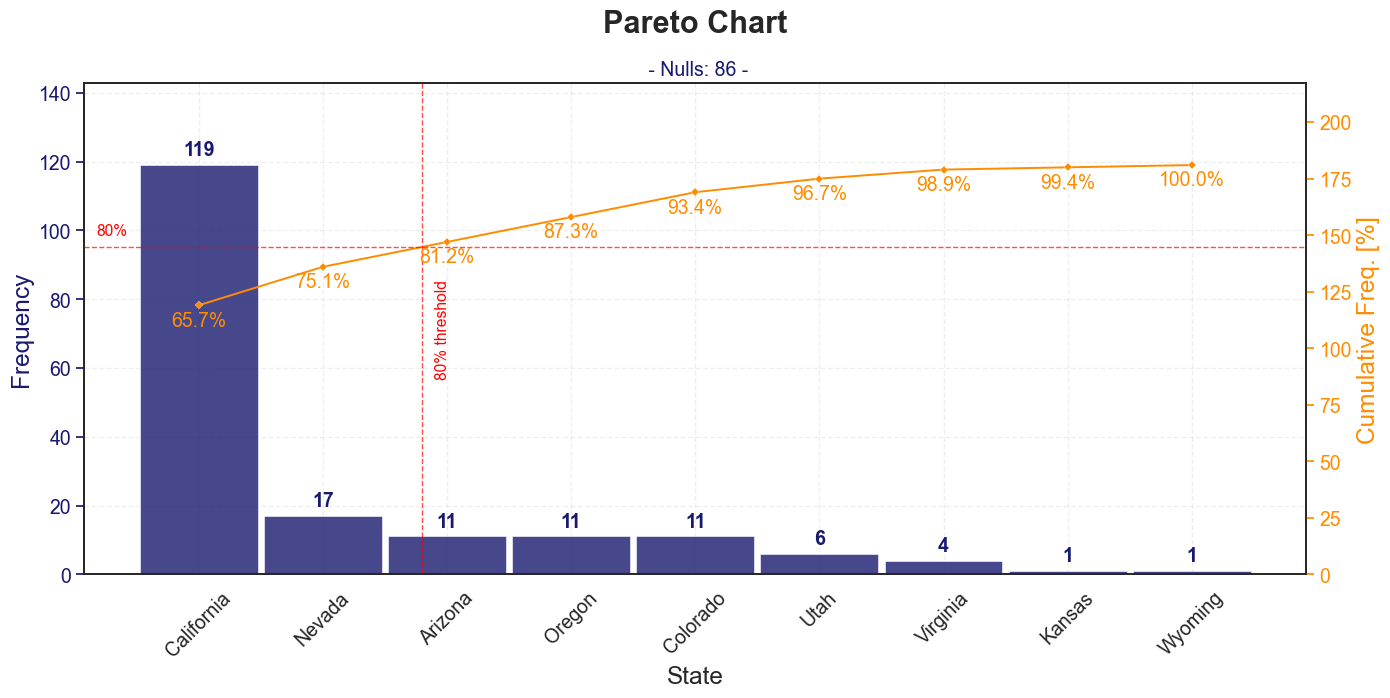

In [45]:
fig = plt_pareto4(df['State'], value_counts=True, scale=4, cumulative_scale_mode='proportional')

In [72]:
def plt_pareto5(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    show_grid: bool = True,
    alpha: float = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # In this case don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                label_type='edge',  # Etiqueta fuera de la barra
                padding=2)          #, rotation=90)  # opcional

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    
    # Calculate cumulative values
    cumulative_percentages = fdt.iloc[:, -1]  # last column: ['Cumulative Freq. [%]']
    
    if scaled_cumulative:
        # MODO ESCALADO CORREGIDO
        total_sum = fdt.iloc[:, 0].sum()
        
        # Convertir porcentajes acumulativos a alturas escaladas
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Dibujar la línea escalada en el eje principal
        line = ax.plot(fdt.index, scaled_values,
                       color=color2,
                       marker="D",
                       markersize=markersize,
                       linewidth=linewidth,
                       markeredgecolor='white',
                       markeredgewidth=0.2)
        
        # CORRECCIÓN CRÍTICA: Ajustar límites del eje principal para incluir la línea
        max_freq = fdt.iloc[:, 0].max()
        max_scaled = scaled_values.max()
        # Usar el máximo entre las barras y la línea escalada, con margen
        ax.set_ylim(0, max(max_freq, max_scaled) * 1.2)
        
        # CORRECCIÓN: Configurar ax2 para que coincida con la escala del eje principal
        ax2.set_ylim(0, max(max_freq, max_scaled) * 1.2)
        
        # Crear ticks personalizados para ax2 que muestren porcentajes
        # pero correspondan a las alturas escaladas
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * 1.2:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # Etiquetas de los puntos (en porcentaje) 
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            if i == 0:          # first % annotate, alejado de la barra (qwen)
                distance = 0.08
            else:
                distance = 0.02
            ax.annotate(txt,
                       (fdt.index[i], scaled_values.iloc[i] + (max(max_freq, max_scaled) * distance)),
                       color=color2,
                       fontsize=bar_label_size,
                       ha='center')
        
        # Líneas de referencia en modo escalado
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # Línea horizontal
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--', 
                      alpha=0.7, linewidth=reference_linewidth)
            
            # Etiqueta para la línea horizontal
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02), 
                   f'{reference_pct}%', 
                   transform=ax.get_yaxis_transform(), 
                   color=reference_color, fontsize=bar_label_size*0.8)
            
            # Línea vertical
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                          alpha=0.7, linewidth=reference_linewidth)
                
                ax.text(x_reference_percent + 0.1, 
                       reference_scaled_height - (max(max_freq, max_scaled) * 0.1), 
                       f'{reference_pct}% threshold', 
                       rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                       ha='left', va='center')
    
    else:
        # MODO ORIGINAL (sin cambios)
        ax2.set_ylim(0, 100 * 1.1)
        
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())

        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 6),
                            color=color2,
                            fontsize=bar_label_size,
                            ha='center')
        
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=0.7, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                           alpha=0.7, linewidth=reference_linewidth)
                
                ax2.text(x_reference_percent + 0.1, reference_pct - 25, 
                         f'{reference_pct}% threshold', 
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                        ha='left', va='center')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits (solo para modo original)
    if not scaled_cumulative:
        max_freq = fdt.iloc[:, 0].max()
        ax.set_ylim(0, max_freq * 1.2)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1)
    ax.set_xlabel(x_label, fontsize=axis_label_size)
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)

    return fig, (ax, ax2)

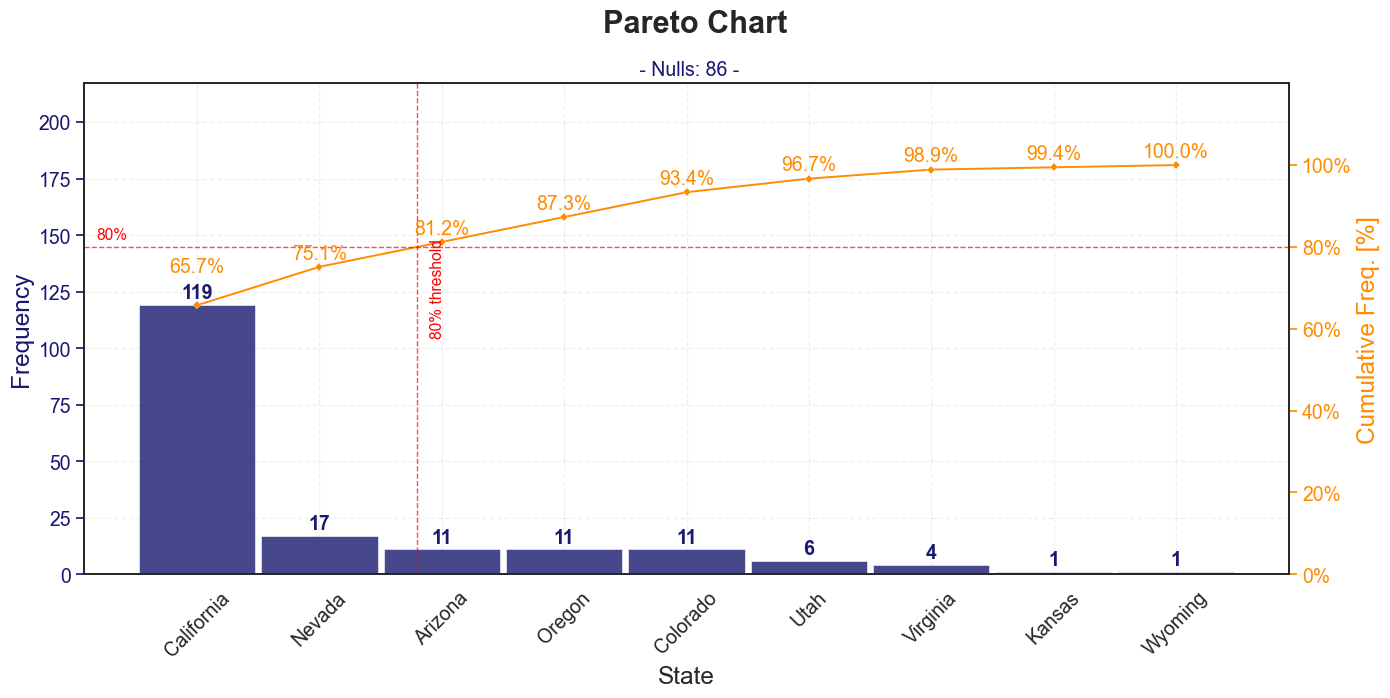

In [73]:
fig = plt_pareto5(df['State'], value_counts=True, scale=4, scaled_cumulative=True)